# Decision Tree

1. Split the dataset into 70% training set and 30% test set.

In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn import preprocessing

boston = load_boston()
X = boston.data
Y = boston.target
name_data = boston.feature_names

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# lab = preprocessing.LabelEncoder()
# y_train = lab.fit_transform(y_train)
# y_test = lab.fit_transform(y_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

d:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fu

2. Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can
be used to generate predictions for your data

In [46]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(x_train,y_train)
dtc_y_predict = dtc.predict(x_test)

3. Report the tree depth, number of leaves, feature importance, train score, and test score
of the tree. Let the tree depth be Td.

In [47]:
Td = dtc.get_depth()
print("Tree depth:",Td)
print("Number of leaves:",dtc.get_n_leaves())
print("Feature importance:",dtc.feature_importances_)
print("Train score:",dtc.score(x_train, y_train))
print("Test score:",dtc.score(x_test, y_test))

Tree depth: 15
Number of leaves: 211
Feature importance: [0.13895795 0.01447647 0.02266837 0.00472701 0.06158683 0.14766369
 0.13347629 0.09253787 0.03545839 0.03161715 0.04631375 0.12960923
 0.14090698]
Train score: 1.0
Test score: 0.125


4. Show the visual output of the decision tree.

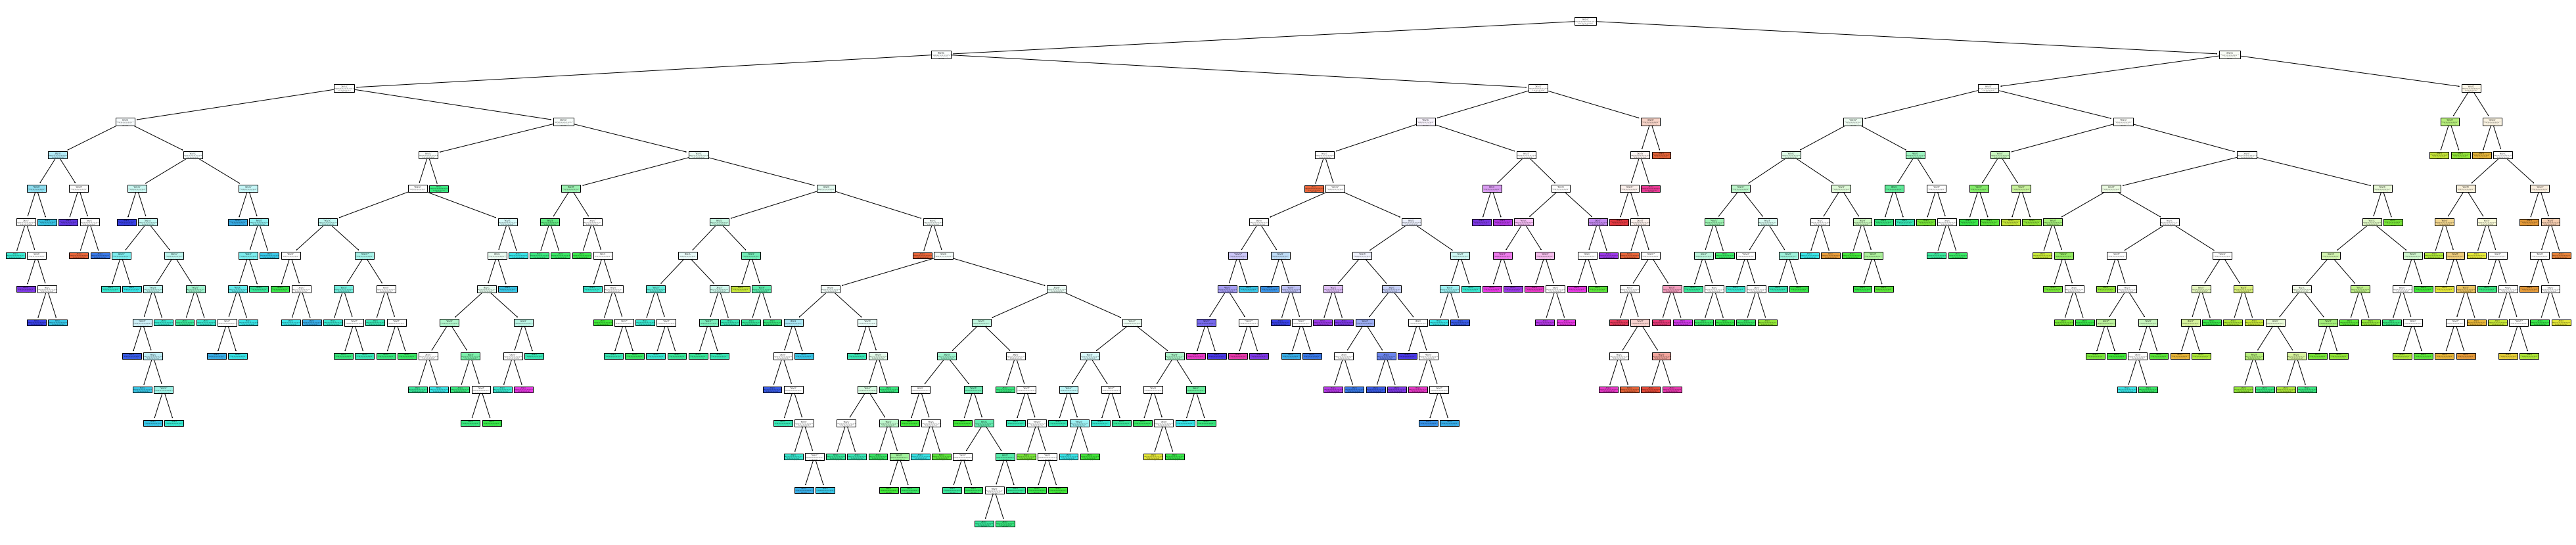

In [48]:
plt.figure(figsize = (20, 20))
plot_tree(dtc, class_names=True, filled=True)
plt.show()

5.6. Generate (Td-1) decision trees on the same training set using fixed tree depths {1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the tree.

In [49]:
test_high = 0
dtc_high = dtc.fit(x_train, y_train)
for depth in range(1, Td):
    dtc = DecisionTreeClassifier(max_depth=depth)
    dtc = dtc.fit(x_train, y_train)
    dtc_y_predict = dtc.predict(x_test)
    # For each of the (Td-1) trees report, tree depth, number of leaves, feature importance, train score, and test score of the tree.
    print("Tree depth:", depth)
    print("Num of leaves:", dtc.get_n_leaves())
    print("Feature importance:", dtc.feature_importances_)
    print("Train score:", dtc.score(x_train, y_train))
    score = dtc.score(x_test, y_test)
    print("Test score:", score, "\n")
    if test_high < score:
        test_high = score
        dtc_high = dtc

Tree depth: 1
Num of leaves: 2
Feature importance: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Train score: 0.12146892655367232
Test score: 0.09210526315789473 

Tree depth: 2
Num of leaves: 4
Feature importance: [0.21899423 0.         0.         0.         0.         0.36423967
 0.         0.         0.         0.         0.         0.
 0.4167661 ]
Train score: 0.1553672316384181
Test score: 0.125 

Tree depth: 3
Num of leaves: 8
Feature importance: [0.23951542 0.         0.         0.         0.         0.31471404
 0.         0.08594287 0.         0.         0.         0.
 0.35982767]
Train score: 0.21468926553672316
Test score: 0.17105263157894737 

Tree depth: 4
Num of leaves: 16
Feature importance: [0.20244149 0.         0.         0.         0.06543467 0.25884069
 0.         0.09706591 0.         0.         0.05577397 0.08933202
 0.23111125]
Train score: 0.2740112994350282
Test score: 0.125 

Tree depth: 5
Num of leaves: 28
Feature importance: [0.18967778 0.         0.04028389 0.   

7. Show the visual output of the decision tree with highest test score from the (Td-1) trees.

The output of the decision tree whose depth is 3 with highest test score: 0.17105263157894737


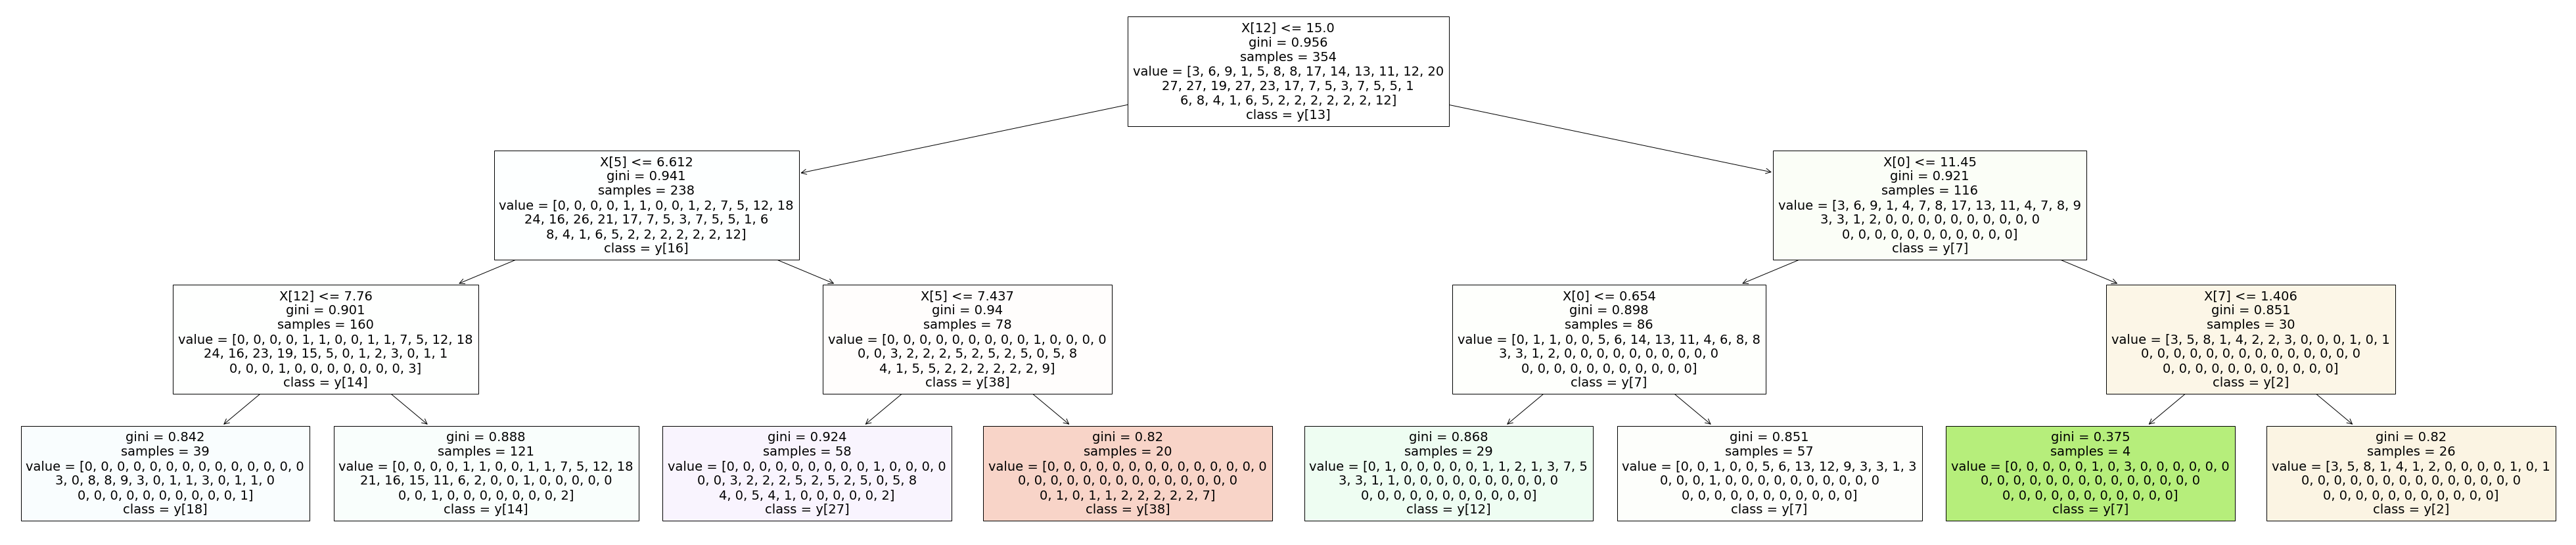

In [50]:
print("The output of the decision tree with highest test score")
print("Tree depth:", dtc_high.get_depth())
print("Test score:", test_high)
plt.figure(figsize = (20, 20))
plot_tree(dtc_high, class_names=True, filled=True)
plt.show()